In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("vgsales.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df = df.dropna(subset=['Year'])


In [5]:
df['Year'] = df['Year'].astype(int)

In [6]:
df['Publisher'].isna().sum()


np.int64(36)

In [7]:
df = df.dropna(subset=['Publisher'])

In [8]:
df.duplicated().sum()


np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


## Top Publishers, Genres and Platforms by Global Sales


We aggregate the top 5 publishers, genres, and platforms by total global sales.  
Global sales values are summed across all games and displayed in **millions**.


In [10]:
top5_publishers = (
    df.groupby('Publisher')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)

top5_genres = (
    df.groupby('Genre')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)

top5_platforms = (
    df.groupby('Platform')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)


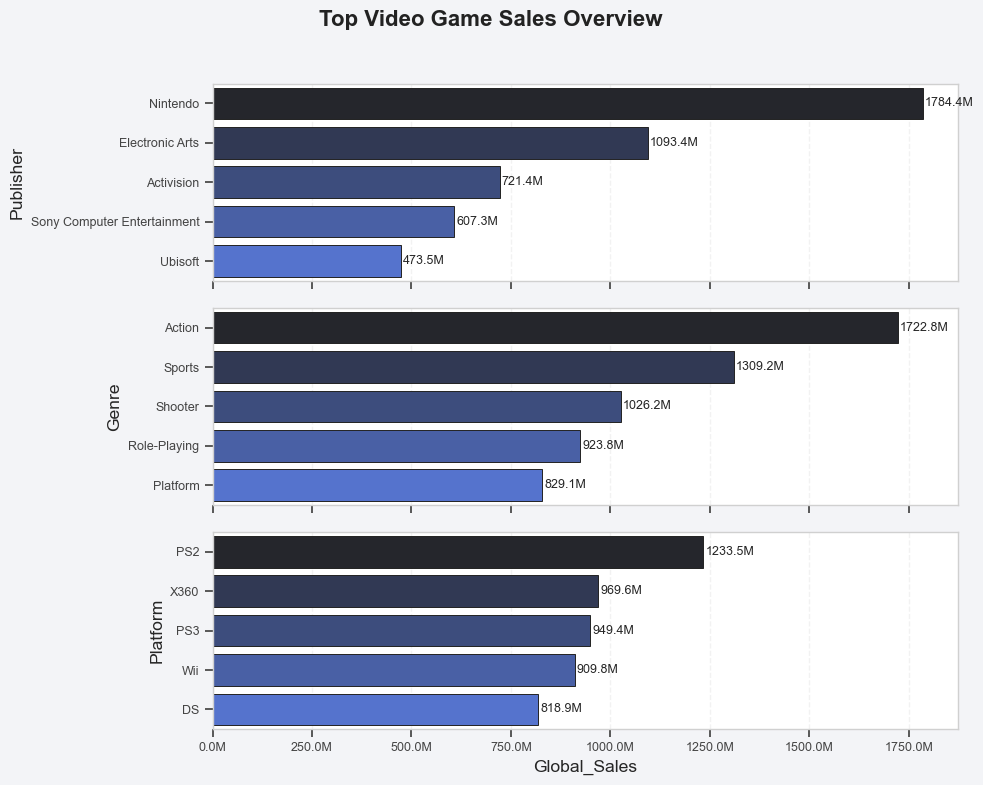

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="ticks", font_scale=1.05)

# -------------------- Helper functions --------------------
def light_for_lowest(values):
    vals = np.array(values)
    order = vals.argsort()
    ranks = np.empty_like(order, dtype=float)
    ranks[order] = np.linspace(0, 1, len(vals))
    pal = sns.dark_palette("royalblue", n_colors=256, reverse=True)
    return [pal[int(r * 255)] for r in ranks]

def format_sales_m(x, pos):
    """Format axis in millions"""
    return f'{x:.1f}M'

# -------------------- Aggregate top 5 --------------------
top5_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).reset_index()
top5_genres     = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5).reset_index()
top5_platforms  = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).reset_index()

# -------------------- Create figure --------------------
fig, axes = plt.subplots(
    3, 1,
    figsize=(10, 8),
    sharex=True,
    facecolor="#f3f4f7"
)

fig.suptitle(
    'Top Video Game Sales Overview',
    fontsize=16,
    fontweight='bold',
    color="#222222"
)

# -------------------- Style axes --------------------
for ax in axes:
    ax.set_facecolor("#ffffff")
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("#d0d0d0")
        spine.set_linewidth(1)
    ax.grid(axis='x', linestyle='--', alpha=0.25)
    ax.set_axisbelow(True)
    ax.tick_params(axis='both', labelsize=9, colors="#444444")
    ax.xaxis.set_major_formatter(FuncFormatter(format_sales_m))

# -------------------- Plot function --------------------
def plot_bar_with_labels(ax, data, x_col, y_col):
    colors = light_for_lowest(data[x_col])
    sns.barplot(
        ax=ax,
        data=data,
        x=x_col,
        y=y_col,
        hue=y_col,
        palette=dict(zip(data[y_col], colors)),
        dodge=False,
        edgecolor='#222222',
        linewidth=0.7,
        legend=False
    )
    # Add labels on top of bars
    for p in ax.patches:
        ax.text(
            p.get_width() + 5,  # slightly to the right
            p.get_y() + p.get_height()/2,
            f'{p.get_width():.1f}M',  # show in millions
            va='center',
            fontsize=9
        )

# -------------------- Plot --------------------
plot_bar_with_labels(axes[0], top5_publishers, 'Global_Sales', 'Publisher')
plot_bar_with_labels(axes[1], top5_genres,     'Global_Sales', 'Genre')
plot_bar_with_labels(axes[2], top5_platforms,  'Global_Sales', 'Platform')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


We filter for Nintendo games and show the top 10 by global sales.  
This allows us to see which individual games contributed most to Nintendo's cumulative sales.


C:\Users\mvina\AppData\Local\Temp\ipykernel_84572\563805398.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\mvina\AppData\Local\Temp\ipykernel_84572\563805398.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')  # or 45 degrees [web:28][web:34]


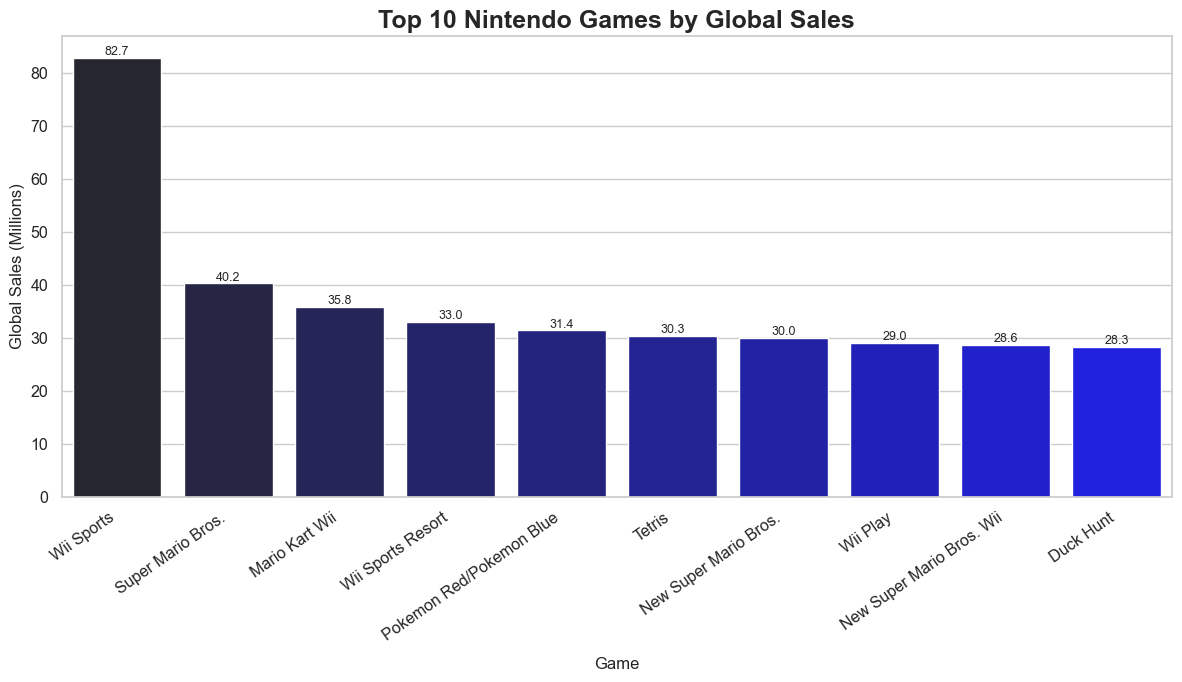

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter Top 10 Nintendo games
nintendo_games = df[df['Publisher'] == 'Nintendo']
top_nintendo_games = (
    nintendo_games
    .sort_values('Global_Sales', ascending=False)
    .head(10)
)

sns.set_theme(style="whitegrid", font_scale=1.05)

fig, ax = plt.subplots(figsize=(12, 7))

blue_palette = sns.dark_palette("blue", n_colors=10)   # similar style, but blue [web:57]

sns.barplot(
    data=top_nintendo_games,
    x='Name',
    y='Global_Sales',
    palette=blue_palette,   # use the dark blue palette
    ax=ax
)


# Value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, rotation=0)

# Titles and labels
ax.set_title("Top 10 Nintendo Games by Global Sales", fontsize=18, fontweight='bold')
ax.set_xlabel("Game", fontsize=12, labelpad=10)
ax.set_ylabel("Global Sales (Millions)", fontsize=12)

# Rotate x labels so names are readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')  # or 45 degrees [web:28][web:34]

plt.tight_layout()
plt.show()


## Regional Contribution to Global Sales

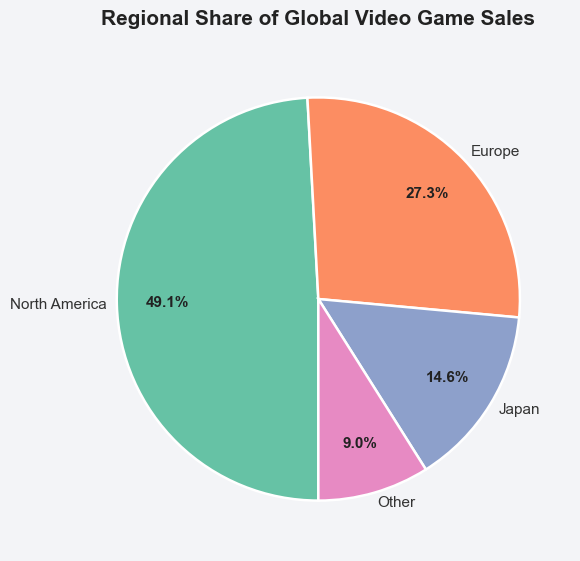

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

region_sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
labels = ['North America', 'Europe', 'Japan', 'Other']

# Seaborn-like color palette
colors = sns.color_palette("Set2", 4)  # soft but saturated categorical palette[web:43]

plt.figure(figsize=(6, 6), facecolor="#f3f4f7")
ax = plt.gca()
ax.set_facecolor("#fdfdfd")

wedges, texts, autotexts = plt.pie(
    region_sales,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=-90,                       # NA slice horizontal
    counterclock=False,
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 1.8,
        'antialiased': True
    },                                    # crisp borders[web:78]
    pctdistance=0.75,
    labeldistance=1.05,
    textprops={'fontsize': 11, 'color': '#333333'}
)

# Style percentage labels
for at in autotexts:
    at.set_fontweight('bold')
    at.set_color('#222222')

# Title styled like Seaborn examples
plt.title(
    'Regional Share of Global Video Game Sales',
    fontsize=15,
    fontweight='bold',
    pad=16,
    color="#222222"
)

# Remove axes frame for a clean gallery look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()



## Relationship Between North America and Europe Sales
**Insight:**  
High-selling games in North America generally perform well in Europe, indicating similar market behavior.


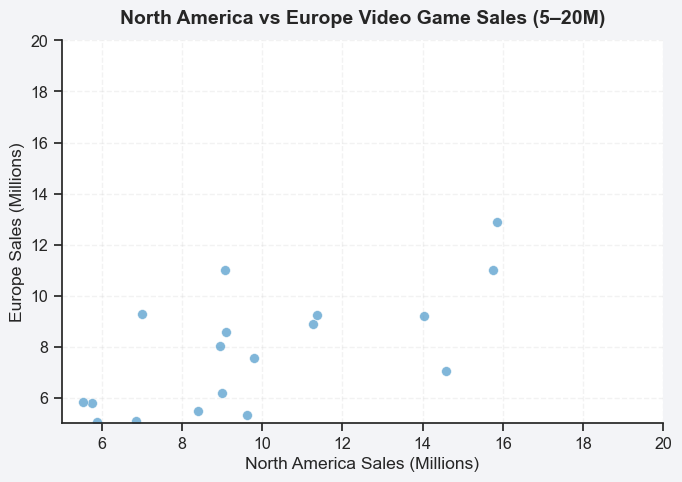

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_high = df[(df['NA_Sales'] >= 5) & (df['NA_Sales'] <= 20) &
             (df['EU_Sales'] >= 5) & (df['EU_Sales'] <= 20)]

sns.set_theme(style="ticks", font_scale=1.05)

plt.figure(figsize=(7, 5), facecolor="#f3f4f7")
ax = plt.gca()
ax.set_facecolor("#ffffff")

sns.scatterplot(
    data=df_high,
    x='NA_Sales',
    y='EU_Sales',
    s=50,
    alpha=0.7,
    color=sns.color_palette("Blues", 4)[2],
    edgecolor="white",
    linewidth=0.5
)
ax.set_xlim(5, 20)
ax.set_ylim(5, 20)

ax.set_title('North America vs Europe Video Game Sales (5–20M)',
             fontsize=14, fontweight='bold', pad=12)
ax.set_xlabel('North America Sales (Millions)')
ax.set_ylabel('Europe Sales (Millions)')

ax.grid(True, which='major', linestyle='--', alpha=0.25)
ax.set_axisbelow(True)
sns.despine(ax=ax)

plt.tight_layout()
plt.show()




**Insight:**  
Global video game sales show steady early growth, with acceleration beginning in the late 1980s.

In [14]:
early = sales_by_year_region.loc[1980:1995]

sns.set_theme(style="ticks", font_scale=1.05)  # clean, pro theme[web:157]

plt.figure(figsize=(10, 4), facecolor="#f3f4f7")
ax = plt.gca()
ax.set_facecolor("#ffffff")

# Use nicer color cycle and add markers
sns.lineplot(
    data=early,
    linewidth=2,
    dashes=False,
    marker="o",
    markersize=4,
    ax=ax
)

ax.set_title('Regional Video Game Sales, 1980–1995',
             fontsize=14, fontweight='bold', pad=10)
ax.set_ylabel('Sales (Millions)')
ax.set_xlabel('Year')

# Show only selected year ticks for readability
ax.set_xticks(range(1980, 1996, 2))  # every 2 years[web:153]

# Light grid and clean spines
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)
sns.despine(ax=ax)

# Place legend outside for a report-style look
ax.legend(title='Region', frameon=False, loc='center left',
          bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()


NameError: name 'sales_by_year_region' is not defined

## Conclusion

This analysis highlights how a small number of publishers and genres dominate the global video game market. Regional sales patterns show strong alignment between North America and Europe, while Japan follows different trends. These insights can support market strategy and regional targeting decisions.
